In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_excel("resources\Datathon_data-2025-Raw.xlsx")

print(list(raw_data.columns.values))

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\PikaKight-Starlight\AppData\Local\Temp\ipykernel_6496\3425211603.py:1: SyntaxWarning: invalid escape sequence '\D'
  raw_data = pd.read_excel("resources\Datathon_data-2025-Raw.xlsx")


['Country Name', 'Country Code', 'Time', 'Time Code', 'Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]', 'Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]', 'Air transport, freight (million ton-km) [IS.AIR.GOOD.MT.K1]', 'Air transport, registered carrier departures worldwide [IS.AIR.DPRT]', 'Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS]', 'Broad money growth (annual %) [FM.LBL.BMNY.ZG]', 'Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS]', 'Bank liquid reserves to bank assets ratio (%) [FD.RES.LIQU.AS.ZS]', 'Bank nonperforming loans to total gross loans (%) [FB.AST.NPER.ZS]', 'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]', 'Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]', 'Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]', 'Children out of school (% of primary school age) [SE.PRM.UNER.ZS]', 'Children out of school, female (% of female primary school age) [SE.PRM.UNER.FE.ZS]', 'Children out of

In [3]:
selected_raw_data = raw_data.drop(columns=['Country Name','Country Code', 'Time', 'Time Code'])

cleaned_data = selected_raw_data.replace("..", np.nan).apply(pd.to_numeric, errors='coerce')
print(len(cleaned_data))

cleaned_data.describe()


3260


C:\Users\PikaKight-Starlight\AppData\Local\Temp\ipykernel_6496\2669316101.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data = selected_raw_data.replace("..", np.nan).apply(pd.to_numeric, errors='coerce')


,Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],"Air transport, freight (million ton-km) [IS.AIR.GOOD.MT.K1]","Air transport, registered carrier departures worldwide [IS.AIR.DPRT]",Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS],Broad money growth (annual %) [FM.LBL.BMNY.ZG],Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS],Bank liquid reserves to bank assets ratio (%) [FD.RES.LIQU.AS.ZS],Bank nonperforming loans to total gross loans (%) [FB.AST.NPER.ZS],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",...,"Short-term debt (% of exports of goods, services and primary income) [DT.DOD.DSTC.XP.ZS]",Income share held by fourth 20% [SI.DST.04TH.20],Income share held by highest 10% [SI.DST.10TH.10],Income share held by highest 20% [SI.DST.05TH.20],Income share held by lowest 10% [SI.DST.FRST.10],Income share held by lowest 20% [SI.DST.FRST.20],Income share held by second 20% [SI.DST.02ND.20],Income share held by third 20% [SI.DST.03RD.20],Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]
count,2.299000e+03,2299.000000,1933.000000,2.031000e+03,2251.000000,2244.000000,1764.000000,2129.000000,1800.000000,908.000000,...,1631.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,2597.000000,2.449000e+03
mean,3.513186e+11,10739.568035,1296.234035,2.014360e+05,63.205683,12.359309,9.313612,24.927090,6.928161,60.656958,...,18.446957,22.082987,28.035822,43.352930,2.685728,6.935444,11.659735,15.971172,4.284641,1.661873e+10
std,1.426084e+12,14828.902355,4258.072322,8.210656e+05,48.081241,23.756766,5.287348,28.937897,8.015412,39.671899,...,19.847452,1.155282,5.507708,6.050551,0.873262,1.823794,1.946927,1.707702,2.471449,7.002536e+10
min,1.694327e+08,108.884410,0.000000,0.000000e+00,0.014517,-99.888243,-1.322527,0.204755,0.092335,1.845685,...,0.000000,15.700000,18.400000,32.600000,0.800000,2.400000,4.700000,8.000000,0.499852,8.535742e+06
25%,8.365480e+09,1433.041920,1.384000,7.648684e+03,33.856519,4.972290,6.923343,10.371487,2.174467,32.525535,...,4.307669,21.600000,24.000000,38.800000,2.000000,5.600000,10.400000,15.000000,2.838791,2.593582e+08
50%,3.060203e+10,4226.144704,22.206886,2.547800e+04,52.819588,9.407336,8.903706,18.591528,4.117839,51.147052,...,13.035262,22.300000,26.600000,41.800000,2.800000,7.150000,12.000000,16.400000,3.940700,1.159955e+09
75%,1.788599e+11,12429.619608,480.379190,1.232897e+05,77.654159,15.607286,11.164335,29.052673,8.865556,80.293919,...,25.809709,22.800000,30.875000,46.600000,3.300000,8.300000,13.100000,17.200000,5.150000,7.485187e+09
max,1.959300e+13,81275.574702,46004.645648,1.009903e+07,461.607361,708.928600,179.431226,390.110049,61.116041,249.411354,...,135.709123,25.500000,51.800000,68.900000,4.500000,10.500000,15.400000,19.100000,23.628830,1.046599e+12


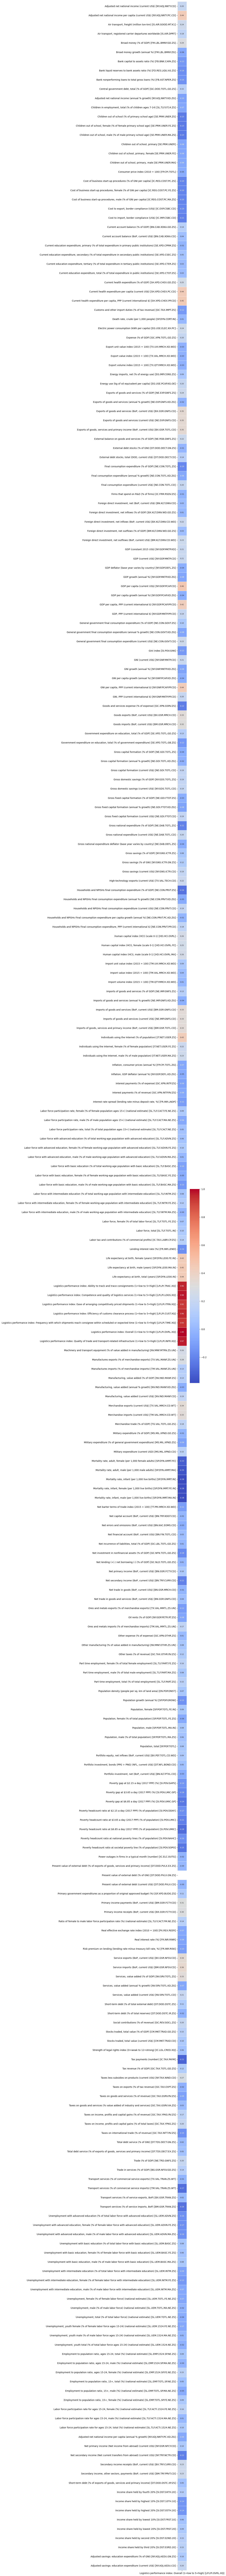

In [4]:
target = "Logistics performance index: Overall (1=low to 5=high) [LP.LPI.OVRL.XQ]"

cleaned_data = cleaned_data[cleaned_data.isnull().mean(axis=1) <= 0.5]

cleaned_data = cleaned_data.fillna(cleaned_data.mean())

correlations = cleaned_data.corr()

target_correlations = correlations[target]

plt.figure(figsize=(5, 200))

heat_map = sns.heatmap(target_correlations.to_frame(),
                        cmap="coolwarm",          # Use a visually appealing colormap
                        cbar=True,
                        annot=True,
                        square=True,
                        fmt='.2f',
                        annot_kws={'size': 7.5},
                        cbar_kws={"shrink": 0.8},
                        linewidths=0.5
                       )
plt.show()

In [5]:

focused_data = cleaned_data[target_correlations[abs(target_correlations) >= 0.2].index]

target_col = focused_data[target]

features = focused_data.drop(columns=['Logistics performance index: Ability to track and trace consignments (1=low to 5=high) [LP.LPI.TRAC.XQ]',
       'Logistics performance index: Competence and quality of logistics services (1=low to 5=high) [LP.LPI.LOGS.XQ]',
       'Logistics performance index: Ease of arranging competitively priced shipments (1=low to 5=high) [LP.LPI.ITRN.XQ]',
       'Logistics performance index: Efficiency of customs clearance process (1=low to 5=high) [LP.LPI.CUST.XQ]',
       'Logistics performance index: Frequency with which shipments reach consignee within scheduled or expected time (1=low to 5=high) [LP.LPI.TIME.XQ]',
       'Logistics performance index: Quality of trade and transport-related infrastructure (1=low to 5=high) [LP.LPI.INFR.XQ]', target])


In [6]:
X = features.values
y = target_col.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linearpipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge_regression', Ridge(alpha=1))
])

linearpipeline.fit(X_train, y_train)

pred = linearpipeline.predict(X_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"""

Mean Square Error: {mse}
R2 Score: {r2}
""")




Mean Square Error: 0.07166383222186004
R2 Score: 0.3315462910039947



In [7]:
coef = linearpipeline.named_steps['ridge_regression'].coef_
feature_names = features.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})

coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()

coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

print(coef_df.head(10))

                                              Feature  Coefficient  \
31  Gross national expenditure (current US$) [NE.D...    -0.207249   
49  Merchandise imports (current US$) [TM.VAL.MRCH...     0.186076   
20           GDP (constant 2015 US$) [NY.GDP.MKTP.KD]     0.162688   
60  Primary income payments (BoP, current US$) [BM...    -0.127628   
50  Mortality rate, adult, female (per 1,000 femal...     0.121119   
28  Goods exports (BoP, current US$) [BX.GSR.MRCH.CD]    -0.118466   
22      GDP per capita (current US$) [NY.GDP.PCAP.CD]     0.112442   
43  Life expectancy at birth, female (years) [SP.D...     0.109923   
54  Mortality rate, infant, male (per 1,000 live b...    -0.095690   
48  Merchandise exports (current US$) [TX.VAL.MRCH...     0.091760   

    abs_coefficient  
31         0.207249  
49         0.186076  
20         0.162688  
60         0.127628  
50         0.121119  
28         0.118466  
22         0.112442  
43         0.109923  
54         0.095690  
48       

In [8]:
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': pred
})

print(comparison.head())

     Actual  Predicted
0  3.850000   3.472061
1  4.108538   3.378501
2  2.940026   2.692443
3  2.940026   2.842758
4  2.940026   2.840282


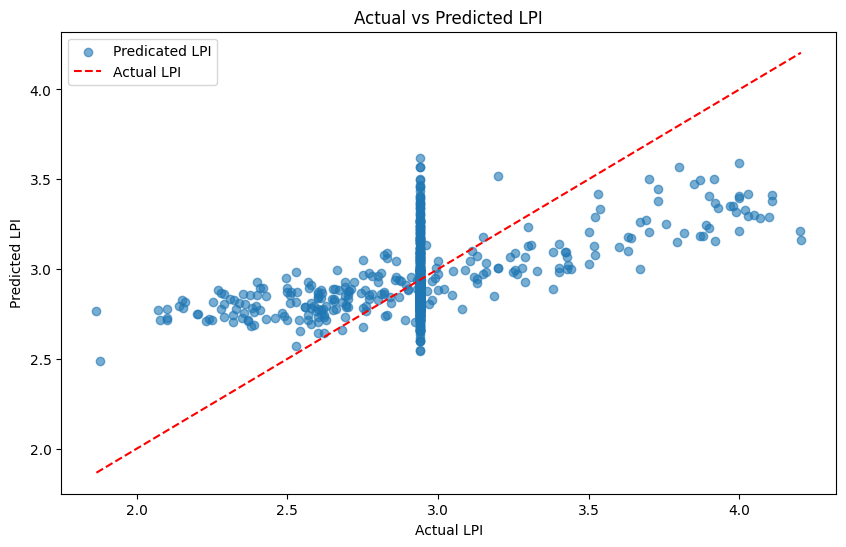

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, pred, alpha=0.6, label="Predicated LPI")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Actual LPI")  # Ideal line

plt.legend(loc='upper left')

plt.xlabel('Actual LPI')
plt.ylabel('Predicted LPI')
plt.title('Actual vs Predicted LPI')

plt.show()